# Case Study 1 - [Wine reviews](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

In [23]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# read red wine dataset
red = pd.read_csv('winequality-red.csv', sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# read white wine dataset
white = pd.read_csv('winequality-white.csv', sep=';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
red.columns == white.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## Assessing Data

Using Pandas, explore ```winequality-red.csv``` and ```winequality-white.csv``` in the Jupyter notebook below to answer quiz questions below the notebook about these characteristics of the datasets:

- number of samples in each dataset
- number of columns in each dataset
- features with missing values
- duplicate rows in the white wine dataset
- number of unique values for quality in each dataset
- mean density of the red wine dataset

In [10]:
# number of samples in each dataset
red.shape[0], white.shape[0]

(1599, 4898)

In [11]:
# number of columns in each dataset
red.shape[1], white.shape[1]

(12, 12)

In [13]:
# features with missing values
red.columns[red.isnull().any()], white.columns[white.isnull().any()]

(Index([], dtype='object'), Index([], dtype='object'))

In [17]:
# duplicate rows in the white wine dataset
sum(red.duplicated()), sum(white.duplicated())

(240, 937)

In [19]:
# number of unique values for quality in each dataset
len(red.quality.unique()), len(white.quality.unique())

(6, 7)

In [20]:
# mean density of the red wine dataset
red.density.mean()

0.9967466791744833

## Appending Data

In [27]:
# red['color'] = 'red'
red['color'] = np.repeat('red', red.shape[0])
white['color'] = np.repeat('white', white.shape[0])

In [30]:
wine = red.append(white)

In [34]:
red.shape, white.shape, wine.shape

((1599, 13), (4898, 13), (6497, 13))

In [35]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [36]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [37]:
# save your successfully combined dataset!
wine.to_csv('winequality.csv', index=False)

## Exploring with Visuals

Use the notebook below to perform exploratory data analysis on your newly combined dataframe. Create some visuals to answer these quiz questions below the notebook.

- Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? ```Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol```
- Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? ```Volatile Acidity, Residual Sugar, pH, Alcohol```

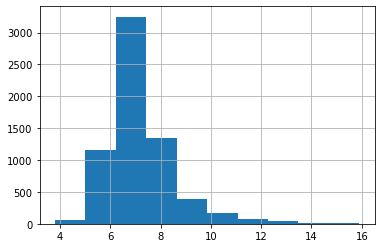

In [38]:
wine['fixed acidity'].hist();

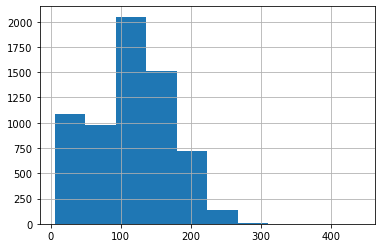

In [39]:
wine['total sulfur dioxide'].hist();

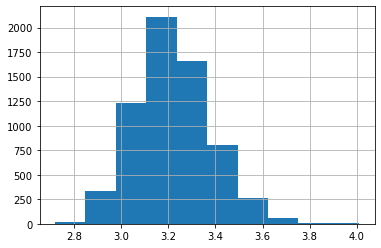

In [40]:
wine['pH'].hist();

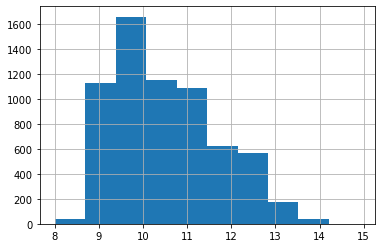

In [41]:
wine['alcohol'].hist();

So, ```Fixed Acidity``` and ```Alcohol``` appear skewed to the right.

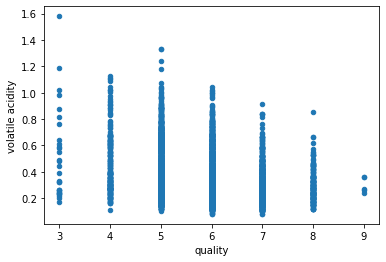

In [42]:
wine.plot(x='quality', y='volatile acidity', kind='scatter');

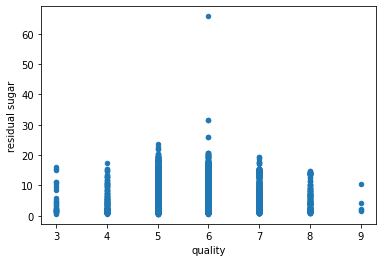

In [43]:
wine.plot(x='quality', y='residual sugar', kind='scatter');

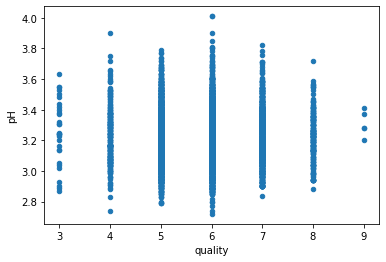

In [46]:
wine.plot(x='quality', y='pH', kind='scatter');

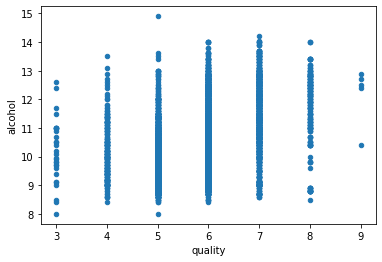

In [47]:
wine.plot(x='quality', y='alcohol', kind='scatter');

So, ```Alcohol``` is most likely to have a positive impact on quality.

## Conclusions Using Groupby

In the notebook below, you're going to investigate two questions about this data using pandas' groupby function. Here are tips for answering each question:

> **Is a certain type of wine (red or white) associated with higher quality?**  
For this question, compare the average quality of red wine with the average quality of white wine with groupby. To do this group by color and then find the mean quality of each group.

In [49]:
# red wine is less than white wine
wine.groupby(['color']).mean()['quality']

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

> **What level of acidity (pH value) receives the highest average rating?**  
This question is more tricky because unlike `color`, which has clear categories you can group by (red and white) `pH` is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. `pandas' cut` function let's you "cut" data in groups. Using this, create a new column called `acidity_levels` with these categories:
> Acidity Levels:
    1. High: Lowest 25% of pH values
    2. Moderately High: 25% - 50% of pH values
    3. Medium: 50% - 75% of pH values
    4. Low: 75% - max pH value
> Here, the data is being split at the 25th, 50th, and 75th percentile. Remember, you can get these numbers with `pandas' describe()`! After you create these four categories, you'll be able to use groupby to get the mean quality rating for each acidity level.

In [56]:
wine.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [58]:
wine['acidity_levels'] = pd.cut(wine.pH, bins=[2.72, 3.11, 3.21, 3.32, 4.01],
                                labels=["High", "Moderate", "Medium", "Low"])

In [59]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderate
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderate
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [62]:
# Low level of acidity receives the highest average rating.
wine.groupby(['acidity_levels']).mean()['quality'].sort_values()

acidity_levels
High        5.783343
Moderate    5.784540
Medium      5.850832
Low         5.859593
Name: quality, dtype: float64

## Conclusions Using Query
In the notebook below, you're going to investigate two questions about this data using ```pandas' query``` function. Here are tips for answering each question:

> **Do wines with higher alcoholic content receive better ratings?**  
To answer this question, use query to create two groups of wine samples:

> 1. Low alcohol (samples with an alcohol content less than the median).  
> 2. High alcohol (samples with an alcohol content greater than or equal to the median).  

Then, find the mean quality rating of each group.  

In [6]:
wine.alcohol.median()

10.3

In [11]:
low_alcholo = wine.query("alcohol < 10.3")
high_alcohol = wine.query("alcohol >= 10.3")

In [12]:
# wines with higher alcoholic content generally receive better ratings
low_alcholo.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

>**Do sweeter wines (more residual sugar) receive better ratings?**  
Similarly, use the median to split the samples into two groups by residual sugar and find the mean quality rating of each group.

In [13]:
wine['residual sugar'].median()

3.0

In [18]:
low_sugar = wine[wine['residual sugar'] < 3]
high_sugar = wine[wine['residual sugar'] >= 3]

In [19]:
# sweeter wines generally receive higher ratings
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

## Type & Quality Plot - Part 1

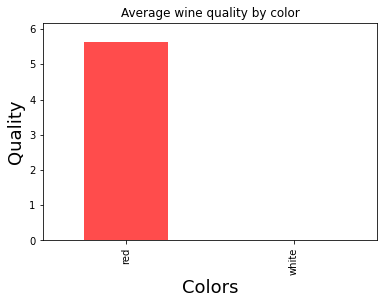

In [24]:
colors = ['red', 'white']
color_means = wine.groupby('color').mean()['quality']

color_means.plot(kind='bar', color=colors, title='Average wine quality by color', alpha=0.7)
plt.xlabel('Colors', fontsize=18)
plt.ylabel('Quality', fontsize=18)
plt.show()